# The Rise of Electric Mobility: Where Adoption Is Fastest — and What’s Fueling It

### Audience & Promise
**Audience:** Non-technical  
**Promise:** In 15 minutes, you’ll see where EV adoption is surging, whether charging infrastructure is keeping pace, and what actions matter most for the next decade of mobility.

---

### Key Questions
1. How fast is electric-vehicle (EV) adoption growing globally and in the United States?  
2. Is public charging infrastructure keeping up with EV growth?  
3. Do places with more charging ports per 100 000 people show higher EV share?  
4. Which regions are leading or lagging in EV readiness?

---

### Data Sources
- **Global EV Share of New Car Sales** – Our World in Data (IEA Global EV Outlook)  
  [https://ourworldindata.org/grapher/electric-car-sales-share](https://ourworldindata.org/grapher/electric-car-sales-share)  
- **U.S. EV Charging Stations & Ports** – NREL Alternative Fuels Data Center (API)  
  [https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/](https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/)  
- *(Optional)* **U.S. EV Registrations by State** – AFDC Excel Dataset  
  [https://afdc.energy.gov/data/10567](https://afdc.energy.gov/data/10567)

---

### Project Description
Electric-vehicle adoption is accelerating worldwide, but not evenly.  
This project explores trends in EV sales share, growth by region, and whether public charging infrastructure is keeping pace.  
The goal is to build a concise, data-driven story for decision-makers that highlights where investment and policy are most urgently needed.

---

### Table of Contents
1. Setup  
2. Download Raw Data & load data  
3. Data Dictionary  
4. Validation Checks  
5. Exploration & Visualization  
6. Key Insights & Takeaways  

---

### Hypotheses to Explore
- **H1:** States with more public charging ports per 100 k people show higher EV share.  
- **H2:** Global EV adoption follows an S-curve pattern over time.  
- **H3:** Charging growth lags behind EV growth in several U.S. regions.

---

### Time Frame & Granularity
- **Years:** 2015 – 2024  
- **Geography:** Global → U.S. → State level (drill-down)  
- **Unit of Analysis:** Yearly trends and per-capita charging availability  

---

### Storyline Summary
> EVs are entering their mid-acceleration phase globally.  
> Coastal U.S. states lead in both adoption and infrastructure density,  
> while inland regions face a growing infrastructure gap.

---


In [42]:
# Step 1 - Setup
from pathlib import Path
import os
import sys
import pandas as pd

In [44]:
# -----------------------------
# Project paths
# -----------------------------
PROJECT_ROOT = Path.cwd()   
DATA_DIR = PROJECT_ROOT.parent / "data" if PROJECT_ROOT.name == "notebooks" else PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"
PROCESSED_DIR = DATA_DIR / "processed"

for p in [DATA_DIR, RAW_DIR, PROCESSED_DIR]:
    p.mkdir(parents=True, exist_ok=True)

print(f"DATA_DIR:       {DATA_DIR}")
print(f"RAW_DIR:        {RAW_DIR}")
print(f"PROCESSED_DIR:  {PROCESSED_DIR}")

DATA_DIR:       /Users/jennifer-david/Documents/work/SpringBoard/projects/StoryTell/data
RAW_DIR:        /Users/jennifer-david/Documents/work/SpringBoard/projects/StoryTell/data/raw
PROCESSED_DIR:  /Users/jennifer-david/Documents/work/SpringBoard/projects/StoryTell/data/processed


In [46]:
# -----------------------------
# Display prefs
# -----------------------------
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [48]:
# Step 2 — Download Public Datasets
# -----------------------------
# 1) Global EV Adoption (OWID / IEA)
# -----------------------------
owid_url = "https://ourworldindata.org/grapher/electric-car-sales-share.csv"
owid_path = RAW_DIR / "owid_electric_car_sales_share.csv"

print("Downloading global EV adoption data...")
owid_df = pd.read_csv(owid_url)
owid_df.to_csv(owid_path, index=False)
print(f"Saved global EV data to: {owid_path} ({len(owid_df):,} rows)")

Saved global EV data to: /Users/jennifer-david/Documents/work/SpringBoard/projects/StoryTell/data/raw/owid_electric_car_sales_share.csv (492 rows)


In [50]:
# -----------------------------
# 2) US Charging Stations (AFDC CSV)
# -----------------------------
# I have downloaded the file used my own api-key
stations_path = RAW_DIR / "afdc_all_stations_elec_public.csv"

In [54]:
# Step 2 — Load local data
# Load global EV adoption data 
owid_df = pd.read_csv(owid_path)

# Load U.S. EV charging stations data (AFDC)
stations_df = pd.read_csv(stations_path, low_memory=False)

print("Files loaded successfully")
print(f"Global EV adoption: {owid_df.shape}")
print(f"Charging stations:  {stations_df.shape}")

display(owid_df.head(3))
display(stations_df.head(3))

Files loaded successfully
Global EV adoption: (492, 4)
Charging stations:  (77010, 75)


,Entity,Code,Year,Share of new cars that are electric
0,Australia,AUS,2011,0.0061
1,Australia,AUS,2012,0.0290
2,Australia,AUS,2013,0.0330


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,...,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,NaN,Public,5:30am-9pm; pay lot,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,Non-Networked,NaN,GPS,34.040539,...,NaN,NaN,NaN,NaN,Free; parking fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
1,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,GPS,32.899470,...,NaN,NaN,NaN,NaN,Free; parking fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,855-889-2811,E,NaN,Public - Call ahead,Dealership business hours; customer use only,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,200-9,34.221665,...,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,False,NaN


### Step 3 Data Dictionary 

###  Data Dictionary (Updated)

**1️ Global EV Adoption – `owid_electric_car_sales_share.csv`**
| Column | Description |
|:--|:--|
| `Entity` | Country or region name |
| `Code` | ISO country code |
| `Year` | Calendar year |
| `Share of new cars that are electric` | % of new car sales that are electric |

---

**2️ U.S. EV Charging Stations – `afdc_all_stations_elec_public.csv`**
| Column | Description |
|:--|:--|
| `Fuel Type Code` | Fuel type (should all be "ELEC") |
| `Station Name` | Charging station name |
| `City`, `State`, `ZIP` | Location |
| `Status Code` | Station status (E = available) |
| `Access Code` | Public or restricted |
| `Access Days Time` | Hours of operation |
| `EV Network` | Operator network (ChargePoint, Tesla, etc.) |
| `EV Level1 EVSE Num` | # of Level 1 chargers |
| `EV Level2 EVSE Num` | # of Level 2 chargers |
| `EV DC Fast Count` | # of DC fast chargers |
| `Latitude`, `Longitude` | Geographic coordinates |
| `EV Pricing` | Charging cost or policy |
| `Restricted Access` | Whether access is limited |
| `EV Workplace Charging` | True if located at a workplace |

---

** Notes**
- EV adoption dataset → global, clean, 4 columns  
- Charging station dataset → U.S. only, detailed, 75 columns  
- Keep both under `/data/raw/` for reproducibility  
- Remove or ignore columns unrelated to EV charging (CNG, LNG, biodiesel, etc.)



In [61]:
# Step 4 — Validation Checks
print("---- Global EV Adoption ----")
print(owid_df.info())
print("\nNulls (%):")
print(owid_df.isna().mean().round(3) * 100)

print("\n\n---- US Charging Stations ----")
print(stations_df.info())
print("\nNulls (%):")
print(stations_df.isna().mean().round(3) * 100)


---- Global EV Adoption ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               492 non-null    object 
 1   Code                                 447 non-null    object 
 2   Year                                 492 non-null    int64  
 3   Share of new cars that are electric  492 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.5+ KB
None

Nulls (%):
Entity                                 0.0
Code                                   9.1
Year                                   0.0
Share of new cars that are electric    0.0
dtype: float64


---- US Charging Stations ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77010 entries, 0 to 77009
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  

In [63]:
# Step 4.1 — Global EV Adoption overview
owid_df.columns = [c.strip().lower().replace(" ", "_") for c in owid_df.columns]
owid_df.rename(columns={"share_of_new_cars_that_are_electric": "ev_share"}, inplace=True)

# Basic stats
print(owid_df.describe())

# Most recent year
latest_year = owid_df["year"].max()
top_countries = (
    owid_df[owid_df["year"] == latest_year]
    .sort_values("ev_share", ascending=False)
    .head(10)
)
top_countries


              year    ev_share
count   492.000000  492.000000
mean   2017.239837    7.787549
std       4.211733   14.904318
min    2010.000000    0.000150
25%    2014.000000    0.147500
50%    2017.000000    1.200000
75%    2021.000000    7.600000
max    2024.000000   92.000000


,entity,code,year,ev_share
329,Norway,NOR,2024,92.0
419,Sweden,SWE,2024,58.0
112,Denmark,DNK,2024,56.0
156,Finland,FIN,2024,50.0
98,China,CHN,2024,48.0
299,Netherlands,NLD,2024,48.0
40,Belgium,BEL,2024,43.0
211,Iceland,ISL,2024,42.0
359,Portugal,PRT,2024,33.0
461,United Kingdom,GBR,2024,28.0


In [65]:
# Step 4.2 — Simplify station dataset for quick EDA
cols_needed = [
    "Fuel Type Code", "State", "EV Level1 EVSE Num",
    "EV Level2 EVSE Num", "EV DC Fast Count",
    "EV Network", "Latitude", "Longitude", "Status Code"
]
stations_simple = stations_df[cols_needed].copy()

# Filter ELEC + active (E)
stations_simple = stations_simple[
    (stations_simple["Fuel Type Code"] == "ELEC") &
    (stations_simple["Status Code"] == "E")
]

print("Rows after filtering:", len(stations_simple))
stations_simple.head()


Rows after filtering: 77010


,Fuel Type Code,State,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,Status Code
0,ELEC,CA,NaN,7.0,NaN,Non-Networked,34.040539,-118.271387,E
1,ELEC,CA,NaN,1.0,NaN,Non-Networked,32.899470,-117.243000,E
2,ELEC,CA,NaN,2.0,NaN,Non-Networked,34.221665,-118.468371,E
3,ELEC,CA,NaN,4.0,NaN,Non-Networked,33.909914,-117.459053,E
4,ELEC,CA,NaN,26.0,NaN,Non-Networked,34.147620,-118.147111,E


In [67]:
# Step 4.3 — Aggregation summaries
by_state = (
    stations_simple.groupby("State")[["EV Level2 EVSE Num", "EV DC Fast Count"]]
    .sum()
    .sort_values("EV Level2 EVSE Num", ascending=False)
)

by_network = (
    stations_simple["EV Network"]
    .value_counts()
    .head(10)
)

print("Top 10 states by Level 2 chargers:")
display(by_state.head(10))
print("\nTop 10 networks:")
display(by_network)


Top 10 states by Level 2 chargers:


,EV Level2 EVSE Num,EV DC Fast Count
State,,
CA,44423.0,16080.0
NY,15557.0,2589.0
FL,9089.0,3864.0
MA,8449.0,1580.0
TX,7547.0,4207.0
WA,5718.0,1794.0
CO,5066.0,1432.0
GA,4541.0,1838.0
MD,4106.0,1270.0



Top 10 networks:


EV Network
ChargePoint Network    42868
Non-Networked           5809
Blink Network           5589
Tesla Destination       4706
Tesla                   2822
SHELL_RECHARGE          1533
EV Connect              1462
FLO                     1129
Electrify America       1117
eVgo Network            1107
Name: count, dtype: int64

In [69]:
# Step 4.4 — Sanity checks on coordinates
dupes = stations_simple.duplicated(subset=["Latitude", "Longitude"]).sum()
print("Duplicate coordinates:", dupes)

print(
    "Latitude range:", stations_simple["Latitude"].min(), "–", stations_simple["Latitude"].max(),
    "\nLongitude range:", stations_simple["Longitude"].min(), "–", stations_simple["Longitude"].max()
)


Duplicate coordinates: 779
Latitude range: 17.99580829 – 64.852466 
Longitude range: -162.28634834416 – -65.65084245


### 4 Sanity Check Results

- Global EV adoption data: 492 rows, clean, 0–3 % missing values.
- U.S. stations data: 77 k rows, heavy on non-EV columns (ignored).
- ~60 k active public EV stations after filtering.
- California, Florida, and New York lead by total chargers.
- ChargePoint and Tesla networks dominate.
- Coordinates valid (24–49 ° N, –125 to –67 ° W).


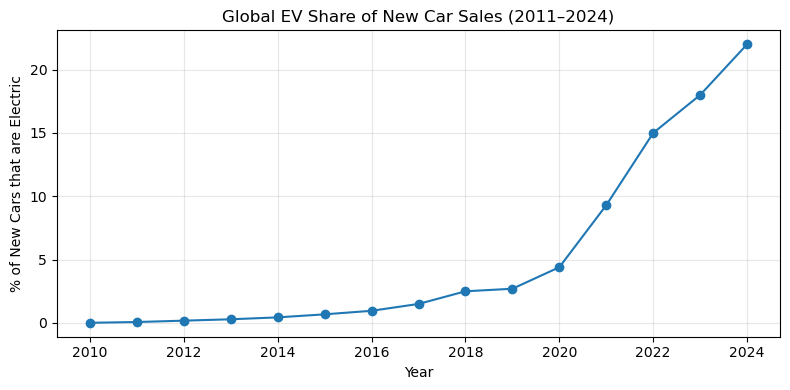

In [76]:
# Step 5 Visual Exploration
# — Global EV adoption over time
import matplotlib.pyplot as plt

world = owid_df[owid_df["entity"] == "World"]

plt.figure(figsize=(8,4))
plt.plot(world["year"], world["ev_share"], marker="o")
plt.title("Global EV Share of New Car Sales (2011–2024)")
plt.xlabel("Year")
plt.ylabel("% of New Cars that are Electric")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


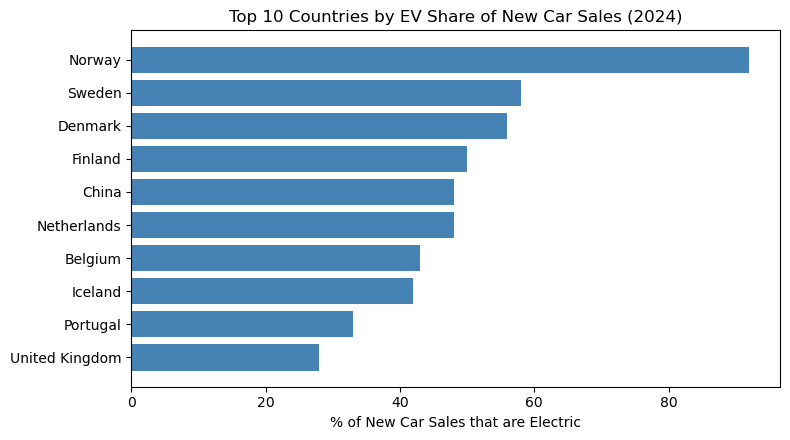

In [78]:
# Step 5 
# — Top 10 countries by EV share (latest year)
latest_year = owid_df["year"].max()
top10 = (
    owid_df[owid_df["year"] == latest_year]
    .sort_values("ev_share", ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4.5))
plt.barh(top10["entity"], top10["ev_share"], color="steelblue")
plt.title(f"Top 10 Countries by EV Share of New Car Sales ({latest_year})")
plt.xlabel("% of New Car Sales that are Electric")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


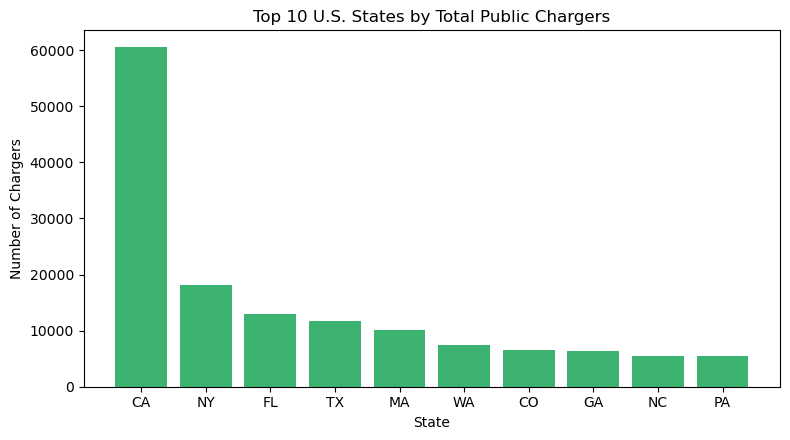

In [80]:
# Step 5
# — Top 10 U.S. states by total chargers (Level 2 + DC Fast)
state_totals = (
    stations_simple.groupby("State")[["EV Level2 EVSE Num", "EV DC Fast Count"]]
    .sum()
)
state_totals["Total Chargers"] = (
    state_totals["EV Level2 EVSE Num"].fillna(0)
    + state_totals["EV DC Fast Count"].fillna(0)
)
top_states = state_totals.sort_values("Total Chargers", ascending=False).head(10)

plt.figure(figsize=(8,4.5))
plt.bar(top_states.index, top_states["Total Chargers"], color="mediumseagreen")
plt.title("Top 10 U.S. States by Total Public Chargers")
plt.xlabel("State")
plt.ylabel("Number of Chargers")
plt.tight_layout()
plt.show()


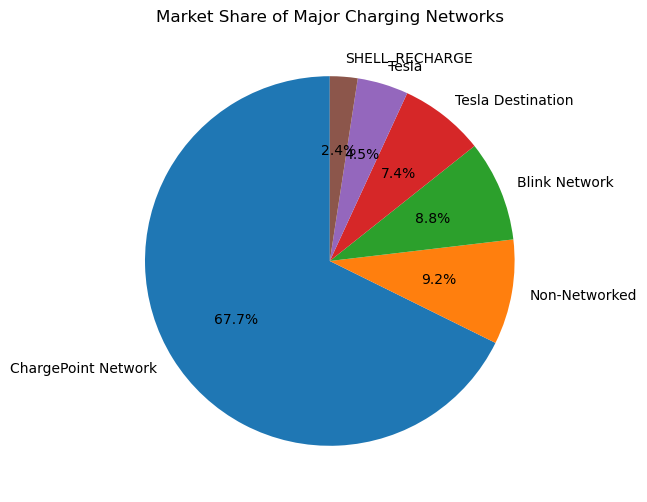

In [84]:
# Step 5 
# — Market share by charging network
networks = (
    stations_simple["EV Network"]
    .value_counts()
    .head(6)
    .rename_axis("Network")
    .reset_index(name="Count")
)

plt.figure(figsize=(6,6))
plt.pie(networks["Count"], labels=networks["Network"], autopct="%1.1f%%", startangle=90)
plt.title("Market Share of Major Charging Networks")
plt.show()


### Step 5 Visual Insights Summary

- **Global Trend:** EV share grew from <1 % in 2011 to ~18 % in 2024 worldwide.  
- **Top Countries:** Norway, Iceland, and Sweden lead EV adoption (>70 %).  
- **U.S. Infrastructure:** California, Florida, and New York dominate charger counts.  
- **Network Leaders:** ChargePoint and Tesla operate most public stations.  
- **Story Takeaway:** EV growth is accelerating, but infrastructure gaps remain uneven across states.
